# Notebook 01 - Dataset Download and Verification (Roboflow → YOLOv8)

This notebook downloads the Indian License Plate dataset from Roboflow in YOLOv8 format,
verifies the dataset structure, checks counts, and visualizes sample images with labels.


In [2]:
!pip install -q roboflow ultralytics opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 124.1 MB/s eta 0:00:00


In [3]:
import os,glob,random
import cv2
import matplotlib.pyplot as plt


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ATUHTf9DF0DoAlA3Tfeg")
project = rf.workspace("nivu").project("indian-license-plate-knte7")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Indian-License-Plate-1 in yolov8:: 100%|██████████| 3312/3312 [00:00<00:00, 6056.94it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
import os,glob,random

DATASET_DIR=dataset.location
print("DATASET_DIR =",DATASET_DIR)


DATASET_DIR = /content/Indian-License-Plate-1


In [7]:
expected=[
    "train/images","train/labels",
    "valid/images","valid/labels",
    "test/images","test/labels",
    "data.yaml"
]

for p in expected:
    full=os.path.join(DATASET_DIR,p)
    print(("✅" if os.path.exists(full) else "❌"),p)


✅ train/images
✅ train/labels
✅ valid/images
✅ valid/labels
✅ test/images
✅ test/labels
✅ data.yaml


In [8]:
def cnt(path,exts):
    c=0
    for e in exts:
        c+=len(glob.glob(os.path.join(path,f"*.{e}")))
    return c

for s in ["train","valid","test"]:
    img_dir=os.path.join(DATASET_DIR,s,"images")
    lab_dir=os.path.join(DATASET_DIR,s,"labels")
    imgs=cnt(img_dir,["jpg","jpeg","png"])
    labs=cnt(lab_dir,["txt"])
    print(f"{s.upper():5} | images={imgs} | labels={labs}")


TRAIN | images=1156 | labels=1156
VALID | images=330 | labels=330
TEST  | images=164 | labels=164


In [9]:
yaml_path=os.path.join(DATASET_DIR,"data.yaml")
print(open(yaml_path,"r").read())


names:
- indian_licence_plate
nc: 1
roboflow:
  license: CC BY 4.0
  project: indian-license-plate-knte7
  url: https://universe.roboflow.com/nivu/indian-license-plate-knte7/dataset/1
  version: 1
  workspace: nivu
test: ../test/images
train: ../train/images
val: ../valid/images



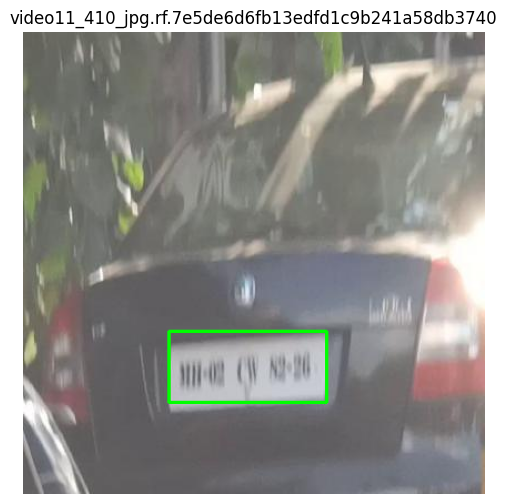

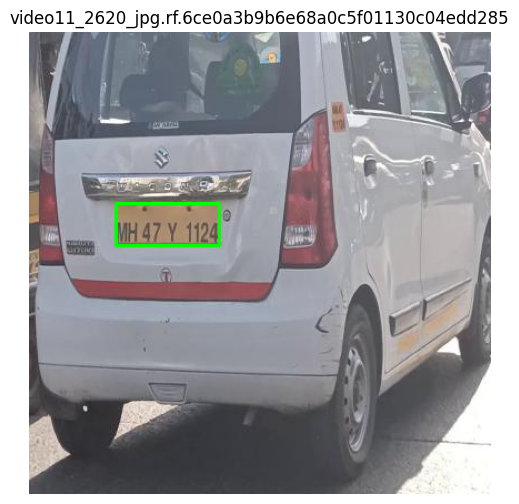

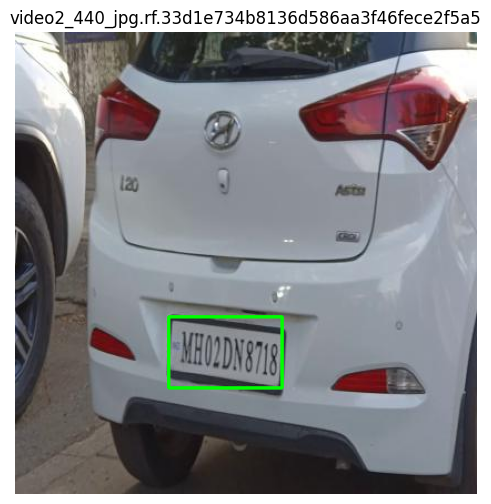

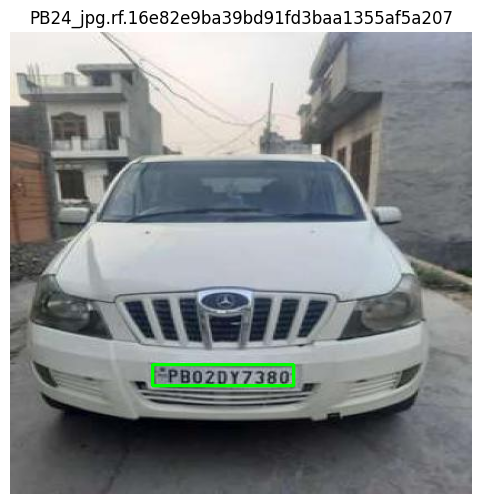

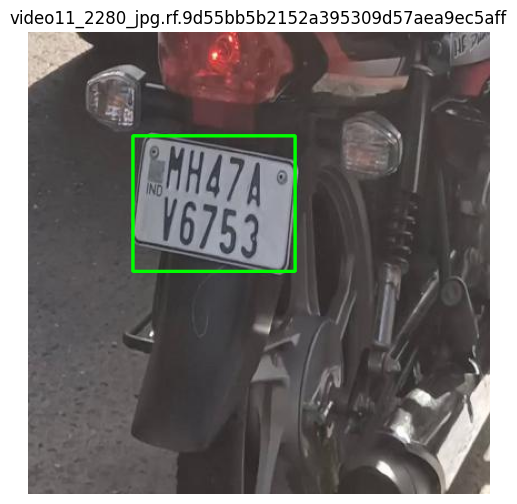

In [10]:
import cv2
import matplotlib.pyplot as plt

train_img_dir=os.path.join(DATASET_DIR,"train","images")
train_lab_dir=os.path.join(DATASET_DIR,"train","labels")

imgs=glob.glob(os.path.join(train_img_dir,"*.jpg"))+glob.glob(os.path.join(train_img_dir,"*.png"))
random.shuffle(imgs)

for img_path in imgs[:5]:
    name=os.path.splitext(os.path.basename(img_path))[0]
    label_path=os.path.join(train_lab_dir,name+".txt")

    img=cv2.imread(img_path)
    h,w=img.shape[:2]

    if os.path.exists(label_path):
        lines=open(label_path).read().strip().split("\n")
        for line in lines:
            if not line.strip():
                continue
            c,x,y,bw,bh=map(float,line.split())
            x1=int((x-bw/2)*w); y1=int((y-bh/2)*h)
            x2=int((x+bw/2)*w); y2=int((y+bh/2)*h)
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)

    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,6))
    plt.imshow(img)
    plt.title(name)
    plt.axis("off")
    plt.show()



In [11]:
print("Use this YAML path for training:",yaml_path)


Use this YAML path for training: /content/Indian-License-Plate-1/data.yaml
